**`Rigde(L2) and Lasso(L1) Linear Regression`**

🔍 Model Performance (R² Score on Test Set):

  Linear R² Score: 0.9300
   Ridge R² Score: 0.9236
   Lasso R² Score: 0.9312


C:\Users\Lenovo\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


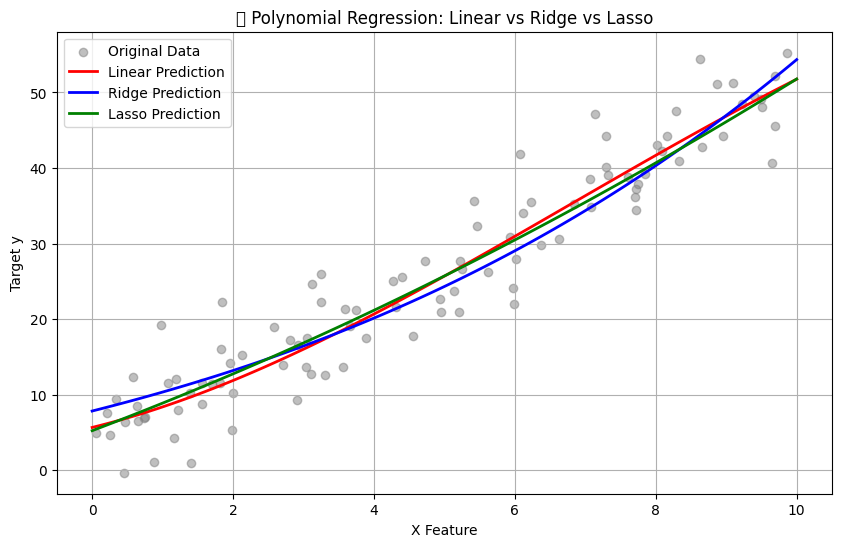

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13692\3309502871.py:95: UserWarning: Glyph 128207 (\N{STRAIGHT RULER}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Lenovo\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128207 (\N{STRAIGHT RULER}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


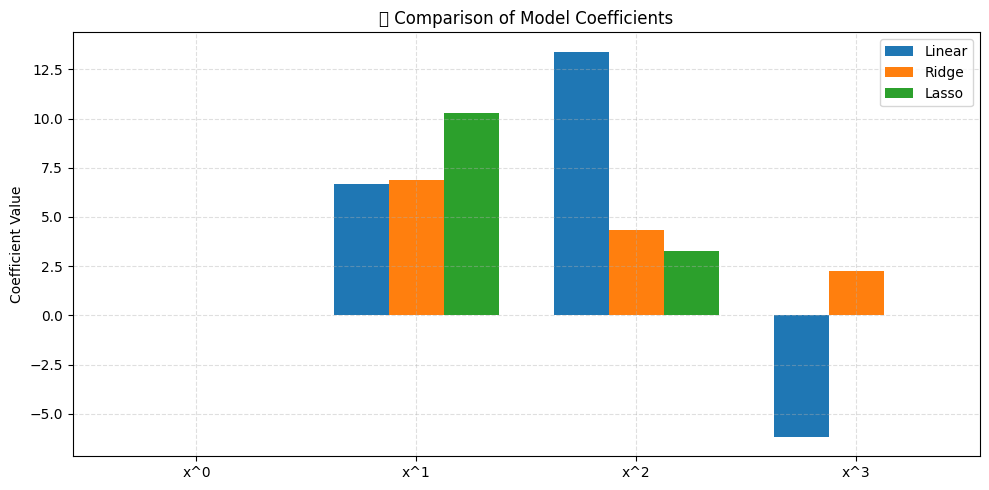

In [4]:
# 📦 Step 1: Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score

# 📊 Step 2: Generate synthetic data (linear + noise)
np.random.seed(42)
X = np.random.rand(100, 1) * 10      # 100 samples between 0 and 10
y = 5 * X + 2 + np.random.randn(100, 1) * 5  # Add noise

# 📎 Step 3: Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🛠️ Step 4: Helper Function to Plot Model Predictions
def plot_predictions(model, model_name, color):
    X_range = np.linspace(0, 10, 100).reshape(-1, 1)
    y_pred = model.predict(X_range)
    plt.plot(X_range, y_pred, color=color, linewidth=2, label=f'{model_name} Prediction')

# 🧪 Step 5: Create and Train Models

# Linear Regression (baseline)
lr_model = make_pipeline(PolynomialFeatures(degree=3), StandardScaler(), LinearRegression())
lr_model.fit(X_train, y_train)

# Ridge Regression
ridge_model = make_pipeline(PolynomialFeatures(degree=3), StandardScaler(), Ridge(alpha=10))
ridge_model.fit(X_train, y_train)

# Lasso Regression
lasso_model = make_pipeline(PolynomialFeatures(degree=3), StandardScaler(), Lasso(alpha=0.5, max_iter=10000))
lasso_model.fit(X_train, y_train)

# 🧾 Step 6: Model Evaluation
models = {
    "Linear": lr_model,
    "Ridge": ridge_model,
    "Lasso": lasso_model
}

print("🔍 Model Performance (R² Score on Test Set):\n")
for name, model in models.items():
    pred = model.predict(X_test)
    print(f"{name:>8} R² Score: {r2_score(y_test, pred):.4f}")

# 📊 Step 7: Visualize the Models
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='gray', label='Original Data', alpha=0.5)

plot_predictions(lr_model, "Linear", "red")
plot_predictions(ridge_model, "Ridge", "blue")
plot_predictions(lasso_model, "Lasso", "green")

plt.title("🔍 Polynomial Regression: Linear vs Ridge vs Lasso")
plt.xlabel("X Feature")
plt.ylabel("Target y")
plt.legend()
plt.grid(True)
plt.show()

# 📈 Step 8: Visualizing Coefficients
# Extracting coefficients from pipeline
def get_coefficients(model):
    last_step = list(model.named_steps.keys())[-1]
    return model.named_steps[last_step].coef_


# Prepare for bar chart
coefs = {
    "Linear": get_coefficients(lr_model).flatten(),
    "Ridge": get_coefficients(ridge_model).flatten(),
    "Lasso": get_coefficients(lasso_model).flatten()
}

plt.figure(figsize=(10, 5))
labels = [f"x^{i}" for i in range(len(coefs["Linear"]))]

x = np.arange(len(labels))
width = 0.25

plt.bar(x - width, coefs["Linear"], width, label='Linear')
plt.bar(x, coefs["Ridge"], width, label='Ridge')
plt.bar(x + width, coefs["Lasso"], width, label='Lasso')

plt.xticks(x, labels)
plt.ylabel("Coefficient Value")
plt.title("📏 Comparison of Model Coefficients")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


optinal

In [2]:
from sklearn.datasets import make_regression
X, y = make_regression(n_samples=100, n_features=1, noise=20, random_state=42)
X,y


(array([[ 0.93128012],
        [ 0.08704707],
        [-1.05771093],
        [ 0.31424733],
        [-0.47917424],
        [ 0.64768854],
        [-0.46341769],
        [ 0.54256004],
        [ 0.61167629],
        [ 1.0035329 ],
        [ 0.8219025 ],
        [ 1.53803657],
        [ 0.73846658],
        [-0.21967189],
        [-0.8084936 ],
        [ 0.09176078],
        [-1.95967012],
        [ 0.51326743],
        [ 1.03099952],
        [-2.6197451 ],
        [ 0.49671415],
        [ 0.09707755],
        [-0.46572975],
        [ 0.91540212],
        [ 1.56464366],
        [ 1.46564877],
        [-0.60063869],
        [-0.03582604],
        [-0.60170661],
        [-1.19620662],
        [ 0.35711257],
        [ 0.37569802],
        [ 0.26105527],
        [-0.5297602 ],
        [-0.90802408],
        [ 0.19686124],
        [-0.29900735],
        [ 0.36163603],
        [ 0.82254491],
        [-0.29169375],
        [ 0.36139561],
        [-0.676922  ],
        [ 1.52302986],
        [-0